In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('train_2.csv')

In [4]:
df.head()

,City1,City2,Passenger_Trips,Aircraft_Trips,RPKs,ASKs,Seats,Month_num,load_factor,city_pair,avg_ac_capacity,daily_ac_trips,est_daily_TOC
0,ALBURY,SYDNEY,12665,323,5724580.0,8372396.0,18523,1,68.4,ALBURYSYDNEY,57.0,10.42,39780.02
1,ALBURY,SYDNEY,15546,459,7026792.0,10958740.0,24245,2,64.1,ALBURYSYDNEY,53.0,15.83,60433.56
2,ALBURY,SYDNEY,12140,435,5487280.0,10427188.0,23069,3,52.6,ALBURYSYDNEY,53.0,14.03,53561.77
3,ALBURY,SYDNEY,314,41,141928.0,877784.0,1942,4,16.2,ALBURYSYDNEY,47.0,1.37,5230.19
4,ALBURY,SYDNEY,416,33,188032.0,793712.0,1756,5,23.7,ALBURYSYDNEY,53.0,1.06,4046.72


In [ ]:
# ['City1','City2','Passenger_Trips','Aircraft_Trips','RPKs','ASKs','Seats','est_daily_TOC']

# ONE HOT ENCODING

In [5]:
df_20_new = pd.get_dummies(data=df, columns=['city_pair'])

In [6]:
df_20_new

,City1,City2,Passenger_Trips,Aircraft_Trips,RPKs,ASKs,Seats,Month_num,load_factor,avg_ac_capacity,...,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,ALBURY,SYDNEY,12665,323,5724580.0,8372396.0,18523,1,68.4,57.0,...,0,0,0,0,0,0,0,0,0,0
1,ALBURY,SYDNEY,15546,459,7026792.0,10958740.0,24245,2,64.1,53.0,...,0,0,0,0,0,0,0,0,0,0
2,ALBURY,SYDNEY,12140,435,5487280.0,10427188.0,23069,3,52.6,53.0,...,0,0,0,0,0,0,0,0,0,0
3,ALBURY,SYDNEY,314,41,141928.0,877784.0,1942,4,16.2,47.0,...,0,0,0,0,0,0,0,0,0,0
4,ALBURY,SYDNEY,416,33,188032.0,793712.0,1756,5,23.7,53.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,SYDNEY,WAGGA WAGGA,269,48,98723.0,838595.0,2285,4,11.8,48.0,...,0,0,0,0,0,0,0,0,0,1
431,SYDNEY,WAGGA WAGGA,549,37,201483.0,723724.0,1972,5,27.8,53.0,...,0,0,0,0,0,0,0,0,0,1
432,SYDNEY,WAGGA WAGGA,0,0,0.0,0.0,0,6,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
433,SYDNEY,WAGGA WAGGA,0,0,0.0,0.0,0,7,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## Checking Corralation

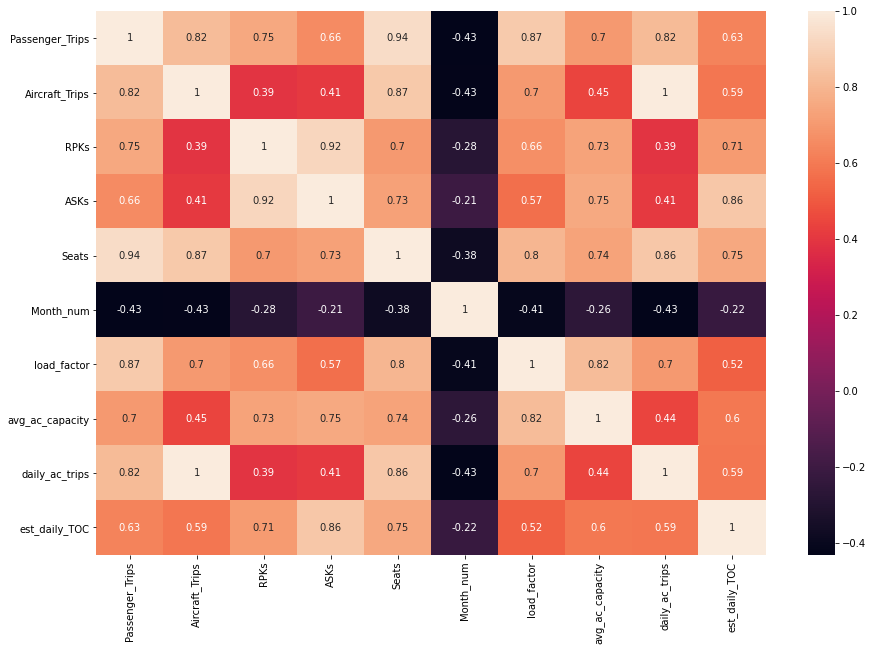

In [7]:
corr = df.corr()
plt.figure(figsize=(15,10))   
sns.heatmap(corr, annot=True) 
plt.show()                 

# Feature Selection

In [8]:
df_20_new.drop(columns=['City1','City2','Passenger_Trips','Aircraft_Trips','RPKs','ASKs','Seats','est_daily_TOC'],inplace=True)

In [9]:
df_20_new

,Month_num,load_factor,avg_ac_capacity,daily_ac_trips,city_pair_ADELAIDEALICE SPRINGS,city_pair_ADELAIDEBRISBANE,city_pair_ADELAIDECANBERRA,city_pair_ADELAIDEGOLD COAST,city_pair_ADELAIDEMELBOURNE,city_pair_ADELAIDEPERTH,...,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,1,68.4,57.0,10.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,64.1,53.0,15.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.6,53.0,14.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16.2,47.0,1.37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.7,53.0,1.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,4,11.8,48.0,1.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
431,5,27.8,53.0,1.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
432,6,0.0,0.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433,7,0.0,0.0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Machine Learning 

## Linear Regreesion

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
X = df_20_new.drop(columns='daily_ac_trips')
y = df_20_new['daily_ac_trips']

In [13]:
X

,Month_num,load_factor,avg_ac_capacity,city_pair_ADELAIDEALICE SPRINGS,city_pair_ADELAIDEBRISBANE,city_pair_ADELAIDECANBERRA,city_pair_ADELAIDEGOLD COAST,city_pair_ADELAIDEMELBOURNE,city_pair_ADELAIDEPERTH,city_pair_ADELAIDEPORT LINCOLN,...,city_pair_PERTHNEWMAN,city_pair_PERTHPORT HEDLAND,city_pair_PERTHSYDNEY,city_pair_PORT MACQUARIESYDNEY,city_pair_PROSERPINESYDNEY,city_pair_SUNSHINE COASTMELBOURNE,city_pair_SUNSHINE COASTSYDNEY,city_pair_SYDNEYTAMWORTH,city_pair_SYDNEYTOWNSVILLE,city_pair_SYDNEYWAGGA WAGGA
0,1,68.4,57.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,64.1,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.6,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16.2,47.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.7,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,4,11.8,48.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
431,5,27.8,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
432,6,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
433,7,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
y

0      10.42
1      15.83
2      14.03
3       1.37
4       1.06
       ...  
430     1.60
431     1.19
432     0.00
433     0.00
434     0.00
Name: daily_ac_trips, Length: 435, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 123)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [ ]:
Linmodel = LinearRegression()

In [ ]:
Linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Linpred = Linmodel.predict(X_test)

In [ ]:
print("Train Accuracy:",Linmodel.score(X_train, y_train).round(2))
print("Test Accuracy:",Linmodel.score(X_test, y_test).round(2))

Train Accuracy: 0.8
Test Accuracy: 0.56


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust
rf = RandomForestRegressor(max_depth=2) #max iter --> makin besar nilainya makin lama
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2)

In [ ]:
y_rf = rf.predict(X_test) #0.05 

In [ ]:
print("Train Accuracy:",rf.score(X_train, y_train).round(2))
print("Test Accuracy:",rf.score(X_test, y_test).round(2))

Train Accuracy: 0.79
Test Accuracy: 0.75


In [ ]:
MAE_rf = mean_absolute_error(y_test,y_rf )

MSE_rf = mean_squared_error(y_test, y_rf)

RMSE_rf = np.sqrt(MSE_rf)

R2_rf = r2_score(y_test, y_rf)

avg_target = (df_20_new['load_factor']).mean()

MAPE = ((MAE_rf/avg_target)*100).round(2)

In [ ]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_rf)
print("MSE : ", MSE_rf)
print("RMSE : ", RMSE_rf)
print("R2 : ", R2_rf)
print(f"MAPE : {MAPE} %")

Hasil Evaluation Matrix : 
MAE :  0.9429847423538166
MSE :  3.291084316397797
RMSE :  1.8141345915884513
R2 :  0.7508016276449655
MAPE : 4.02 %


## hyper parameter

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
modelRF = RandomForestRegressor()
param_RF = {"n_estimators" : [350,375,400],
            "max_depth" : [2,3,4],
            "min_samples_split" : [10,20,30],
            "min_samples_leaf" :[10,20,30]}

In [29]:
hyper_rf = GridSearchCV(estimator=modelRF, param_grid=param_RF, n_jobs = -1, cv = 5, verbose=1 )

In [30]:
hyper_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.1min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [350, 375, 400]},
             verbose=1)

In [31]:
hyper_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 400}

In [32]:
hyper_rf.best_score_

0.6920522222924929

In [33]:
hyper_rf.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=400)

In [34]:
RF_Tuned = hyper_rf.best_estimator_

In [35]:
y_tunedRF = RF_Tuned.predict(X_test)

In [36]:
print("Train Accuracy:",hyper_rf.score(X_train, y_train).round(2))
print("Test Accuracy:",hyper_rf.score(X_test, y_test).round(2))

Train Accuracy: 0.77
Test Accuracy: 0.73


In [37]:
MAE_tunedRF = mean_absolute_error(y_test,y_tunedRF )

MSE_tunedRF = mean_squared_error(y_test, y_tunedRF)

RMSE_tunedRF = np.sqrt(MSE_tunedRF)

R2_tunedRF = r2_score(y_test, y_tunedRF)

avg_target = (df_20_new['load_factor']).mean()

MAPE_tunedRF = ((MAE_tunedRF/avg_target)*100).round(2)

In [38]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_tunedRF)
print("MSE : ", MSE_tunedRF)
print("RMSE : ", RMSE_tunedRF)
print("R2 : ", R2_tunedRF)
print(f"MAPE : {MAPE_tunedRF} %")

Hasil Evaluation Matrix : 
MAE :  1.1003771897032013
MSE :  3.622028377106061
RMSE :  1.9031627300643685
R2 :  0.7257427979886861
MAPE : 4.69 %


## SVR (BEST)

In [39]:
from sklearn.svm import SVR

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust
regressor = SVR(kernel='rbf',C=4,gamma=0.0008,max_iter=7000) #max iter --> makin besar nilainya makin lama
regressor.fit(X_train,y_train)

SVR(C=4, gamma=0.0008, max_iter=7000)

In [56]:
y_svc = regressor.predict(X_test) #0.05 

In [57]:
print("Train Accuracy:",regressor.score(X_train, y_train).round(2))
print("Test Accuracy:",regressor.score(X_test, y_test).round(2))

Train Accuracy: 0.74
Test Accuracy: 0.76


In [58]:
MAE_svc = mean_absolute_error(y_test,y_svc )

MSE_svc = mean_squared_error(y_test, y_svc)

RMSE_svc = np.sqrt(MSE_svc)

R2_svc = r2_score(y_test, y_svc)

avg_target = (df_20_new['load_factor']).mean()

MAPE = ((MAE_svc/avg_target)*100).round(2)

In [59]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_svc)
print("MSE : ", MSE_svc)
print("RMSE : ", RMSE_svc)
print("R2 : ", R2_svc)
print(f"MAPE : {MAPE} %")

Hasil Evaluation Matrix : 
MAE :  0.8868418529511582
MSE :  3.206579522789338
RMSE :  1.7906924701883733
R2 :  0.757200265601004
MAPE : 3.78 %


## XGBoost (Overfit)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42) # Robust

In [ ]:
xg = XGBRegressor(max_depth=1, learning_rate=0.1, n_estimators=65, gamma=0, colsample_bytree=1, subsample=1, reg_alpha=0, reg_lambda=1)

In [ ]:
xg.fit(X_train,y_train)

[12:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=65,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_xg = xg.predict(X_test)

In [ ]:
print("Train Accuracy:",xg.score(X_train, y_train).round(2))
print("Test Accuracy:",xg.score(X_test, y_test).round(2))

Train Accuracy: 0.74
Test Accuracy: 0.7


In [ ]:
MAE_xg = mean_absolute_error(y_test,y_xg )

MSE_xg = mean_squared_error(y_test, y_xg)

RMSE_xg = np.sqrt(MSE_xg)

R2_xg = r2_score(y_test, y_xg)

avg_target = (df_20_new['load_factor']).mean()

MAPE_xg = ((MAE_xg/avg_target)*100).round(2)

#-------------------------------------------------------------------------------------------------

print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_xg)
print("MSE : ", MSE_xg)
print("RMSE : ", RMSE_xg)
print("R2 : ", R2_xg)
print(f"MAPE : {MAPE_xg} %")

Hasil Evaluation Matrix : 
MAE :  1.2781689686892461
MSE :  3.941900888674408
RMSE :  1.9854220933278666
R2 :  0.7015222975150925
MAPE : 5.45 %


In [ ]:
city1 = input('Select City From :')
city2 =input('Select City  To :')
month = int(input('Input Month :'))
load_factor = int(input('Input Load Factor :'))
seat = int(input('Input Avalable Seat :'))
citypair = city1+city2
citypair = citypair.upper()
encode = df_cat[df_cat['city_pair_copy']==citypair].head(1)
encode = encode.values.tolist()
encode = encode[0][1:]
encode[0:0] = [month,load_factor,seat]
loadfactor_pred = (regressor.predict([encode])[0]).round(2)
print(f'Estimate Daily Aircraft Trips : {loadfactor_pred}')

Select City From :albury
Select City  To :sydney
Input Month :9
Input Load Factor :23
Input Avalable Seat :47
Estimate Daily Aircraft Trips : 1.69


# Export Model --> Best SVR 

In [60]:
# import joblib

In [61]:
# joblib.dump(regressor, 'ModelAusAirline')

['ModelAusAirline']